<a href="https://colab.research.google.com/github/pujaji/moja-global/blob/main/Analysis_of_Forest_First_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Selected Forest: South Deccan Plateau dry deciduous forests*

I have selected this forest as I stay in South India and the other more important reason is Sandal Wood Trees only found here, with scientific name Santalum album, which is a valuable tree has been selectively removed from most forests. Considered to be the second most expensive wood in the world, the highly coveted sandalwood has been exploited and traded since ancient times for a multitude of purposes. 



Report of the below Analysis:

South Deccan Plateau dry deciduous forests is in South India 
1. Indian States covered by the forest: 
    Karnataka, Tamil Nadu.
2. Area of the Ecoregion: 81925 km2
3. Biogeographical Realm: IndoMalay
4. Global Status: 1(vulnerable)
5. Biome: 2(Temperate Conifer Forests)

6. Climatic zones: 

    * Tropical Rainforest
    * Tropical Monsoon
    * Tropic mountane
    
7. Land resource distribution:

    * Lexiol
    * Nitisol
    
8. Holdrige Ecological Zone:
    * Subtropical Dry Forest
    * Subtropical Moist Forest
    * Tropical Dry 
    * Tropical Very Dry
    
9. Global Ecological Zone:
    * Tropical dry forest

10. AgroEcological Zones: Types of soil found are
    * Sub-humid, good soils
    * Sub-humid, poor soils
    * Dry, good soils
    * Dry, moderate soils
    * Dry, poor soils
    * Humid, moderate soils
    * Irrigated Soils

 


       


     
     





In [45]:
 # install and import condalab, run twice.
!pip install -q condacolab -q
import condacolab
condacolab.install()



✨🍰✨ Everything looks OK!


In [46]:
# install geopandas, this could take long
!conda install libgcc

!conda install geopandas

import geopandas as gpd

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

# All requested packages already installed.

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.



In [47]:
# for download and decompress the dataset
import os, zipfile, glob, io, requests

# for SIG and spatial info management
from shapely.geometry import Polygon, shape

# for SIG and spatial visualization
import folium
from folium import Choropleth
from folium.plugins import HeatMap

# for dataframes and numerical info management
import numpy as np
import pandas as pd

# for plot and graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})
import io, requests
# for dependencies
%matplotlib inline

In [48]:
# fetching from the repo
! wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip





--2022-04-21 06:45:35--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip [following]
--2022-04-21 06:45:35--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 13.226.52.56, 13.226.52.31, 13.226.52.2, ...
Connecting to naciscdn.org (naciscdn.org)|13.226.52.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210247 (205K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip.1’

ne_110m_admin_0_cou 100%[===================>] 205.32K  --.-KB/s    in 0.05s   

2022-04-21 06:45:35 (3.75 MB/s) - ‘ne_110m_

In [49]:
def read_file(input):
  req = req = requests.get(input).content
  return gpd.read_file(io.StringIO(req.decode('utf-8')))
  

# **India Administrative borders**

In [50]:
india_boundary_url = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/IND/IND_AL2_India_GEZ.json'
india_boundary = read_file(india_boundary_url)

In [51]:
india_boundary = india_boundary[['name', 'geometry']]

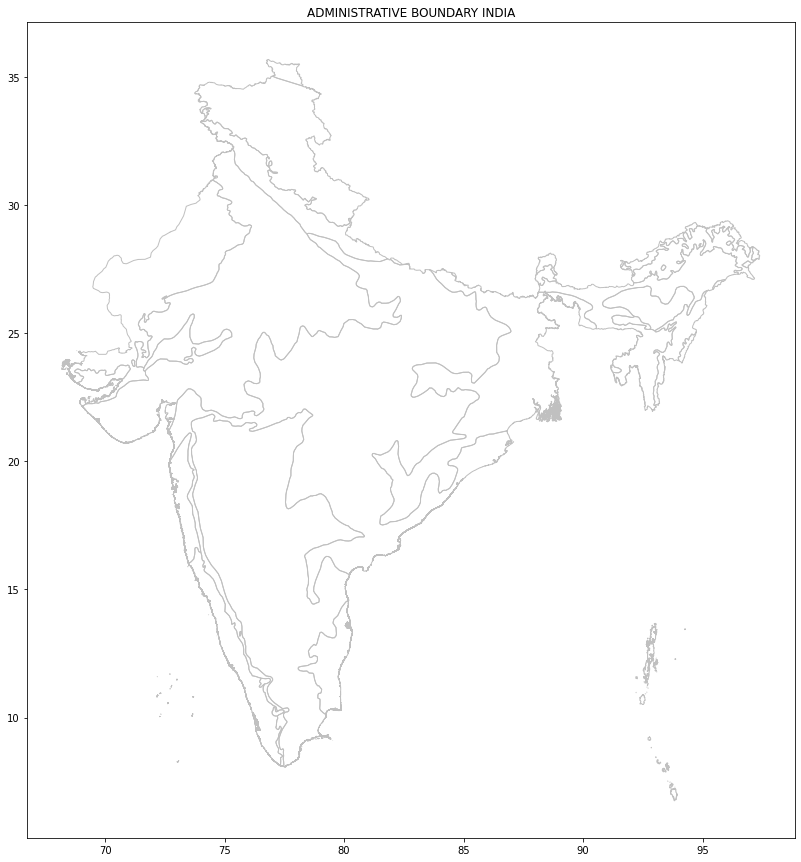

In [52]:
# visualize coutries' borders
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

#ax.set_aspect('equal')
ax.set_title('ADMINISTRATIVE BOUNDARY INDIA')

india_boundary.plot(ax = ax, color ='none', edgecolor = 'silver'  )

plt.show()

# **Exploring Terrestrial dataset**

In [53]:
terrestrial_region_url = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/TerrestrialEcoregionsoftheWorld_WWF.geojson'

In [54]:
terrestrial_region = read_file(terrestrial_region_url)

In [55]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(terrestrial_region['ECO_NAME'])

0                  Northern Mesoamerican Pacific mangroves
1                  Northern Mesoamerican Pacific mangroves
2                                     Sinaloan dry forests
3                  Northern Mesoamerican Pacific mangroves
4                  Northern Mesoamerican Pacific mangroves
5                                               Everglades
6                  Northern Mesoamerican Pacific mangroves
7                  Northern Mesoamerican Pacific mangroves
8                                     Bahamian pine mosaic
9                  Northern Mesoamerican Pacific mangroves
10                                    Bahamian pine mosaic
11                                    Bahamian pine mosaic
12                            Bahamian-Antillean mangroves
13                            Bahamian-Antillean mangroves
14                 Northern Mesoamerican Pacific mangroves
15                 Northern Mesoamerican Pacific mangroves
16                                    Bahamian pine mosa

Forest selected : South Deccan Plateau dry deciduous forests, India








In [56]:
forest = terrestrial_region[terrestrial_region[ 'ECO_NAME'] == 'South Deccan Plateau dry deciduous forests']

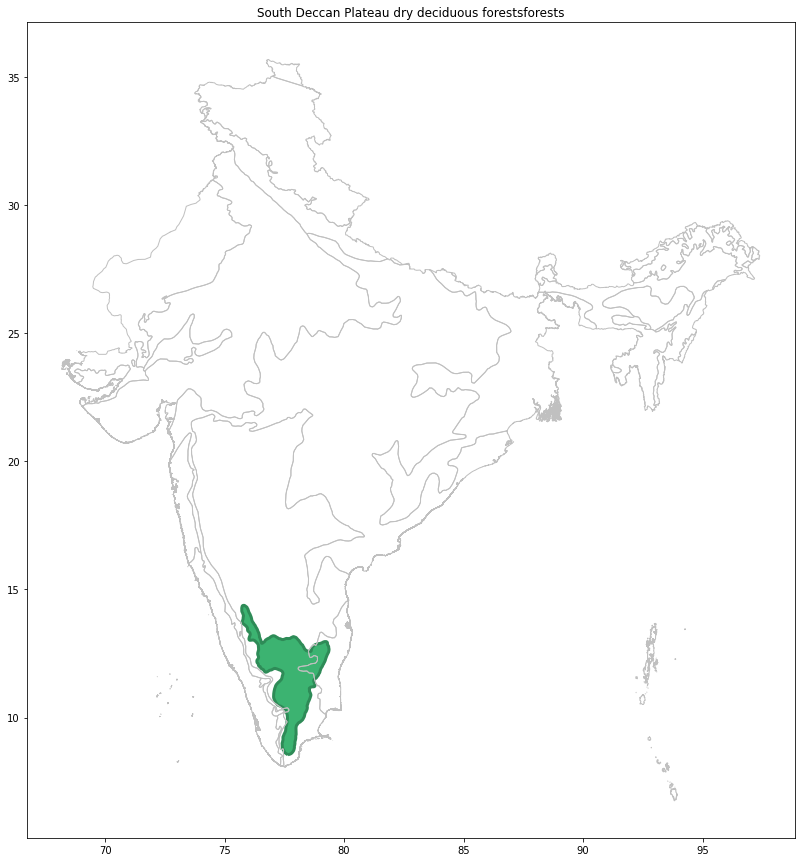

In [57]:
# visualize the forest on the map
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_title('South Deccan Plateau dry deciduous forests')

forest.plot(ax=ax, color= 'mediumseagreen', edgecolor= 'seagreen', linewidth= 3 )
india_boundary.plot(ax = ax, color ='none', edgecolor = 'silver'  )

plt.show()

# **Information about Forest**

In [58]:
area_km2 = forest['area_km2'].unique()[0]
realm    = forest['REALM_1'].unique()[0]
biome    = forest['BIOME'].unique()[0]
gbl_stat = forest['GBL_STAT'].unique()[0]

In [59]:
print(f'Area of the Ecoregion: {area_km2} km2',
      f'Biogeographical Realm: {realm}',
      f'Global Status: {gbl_stat}(vulnerable)',
      f'Biome: {biome}(Temperate Conifer Forests)',
      sep='\n')

Area of the Ecoregion: 81925 km2
Biogeographical Realm: IndoMalay
Global Status: 1(vulnerable)
Biome: 2(Temperate Conifer Forests)


# **Climate Zones**

In [60]:
# download climate data
climate    = 'https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson'
climate = read_file(climate)

In [61]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(climate['CLASS_NAME'])

0         0
1         0
2         0
3         0
4         5
5         5
6         5
7         0
8         0
9         0
10        6
11        6
12        6
13        0
14        0
15        0
16        6
17        6
18        5
19        6
20        6
21        0
22        0
23        0
24        6
25        6
26        6
27        0
28        6
29        6
30        5
31        5
32        0
33        0
34        0
35        0
36        6
37        6
38        6
39        6
40        0
41        5
42        0
43        0
44        0
45        6
46        6
47        0
48        6
49        0
50        6
51        6
52        6
53        6
54        0
55        0
56        0
57        0
58        6
59        0
60        6
61        6
62        6
63        6
64        0
65        6
66        5
67        5
68        6
69        0
70        6
71        6
72        5
73        0
74        6
75        6
76        0
77        6
78        0
79        0
80        5
81        0
82        6
83  

In [62]:
climate_classification = {'1': 'Warm Temperate Moist', '2': 'Warm Temperate Dry', 
                          '3': 'Cool Temperate Moist', '4': 'Cool Temperate Dry', 
                          '5': 'Polar Moist', '6': 'Polar Dry',
                          '7': 'Boreal Moist', '8': 'Boreal Dry',
                          '9': 'Tropical Montane', '10' : 'Cool Temperature Moist',
                          '11' :'Tropical rainforest climate', '12': 'Tropical monsoon climate'}

In [63]:
# normalize column's name
climate.rename(columns={'CLASS_NAME': 'class_name'}, inplace=True)




In [64]:
# replace classification codes with actual names
climate.class_name = climate.class_name.astype('str').replace(climate_classification)


In [65]:
print(climate)

                 class_name                                           geometry
0                         0  MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...
1                         0  MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...
2                         0  MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ...
3                         0  MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ...
4               Polar Moist  MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ...
...                     ...                                                ...
26160  Warm Temperate Moist  MULTIPOLYGON (((-26.35000 -58.40000, -26.35000...
26161  Warm Temperate Moist  MULTIPOLYGON (((-26.65000 -59.00000, -26.65000...
26162  Warm Temperate Moist  MULTIPOLYGON (((-27.40000 -59.40000, -27.40000...
26163  Warm Temperate Moist  MULTIPOLYGON (((-27.25000 -59.40000, -27.25000...
26164                     0  MULTIPOLYGON (((172.85000 61.35000, 172.85000 ...

[26165 rows x 2 columns]


In [66]:
#crop out the selected forest data
forest_climate = climate.clip(forest)

In [67]:
print(forest_climate)

                        class_name  \
19794  Tropical rainforest climate   
20643     Tropical monsoon climate   
20297  Tropical rainforest climate   
20298             Tropical Montane   
20286  Tropical rainforest climate   
20285             Tropical Montane   
20108  Tropical rainforest climate   
20087             Tropical Montane   
20041             Tropical Montane   
20028  Tropical rainforest climate   
20012             Tropical Montane   
20013  Tropical rainforest climate   
19983             Tropical Montane   
20302  Tropical rainforest climate   
19942             Tropical Montane   
20623  Tropical rainforest climate   
20040             Tropical Montane   
20025  Tropical rainforest climate   
19888             Tropical Montane   
19879             Tropical Montane   

                                                geometry  
19794  POLYGON ((75.75000 13.75000, 75.75000 13.68349...  
20643  MULTIPOLYGON (((79.25000 12.90000, 79.25000 12...  
20297  POLYGON ((77.6000

<function matplotlib.pyplot.show>

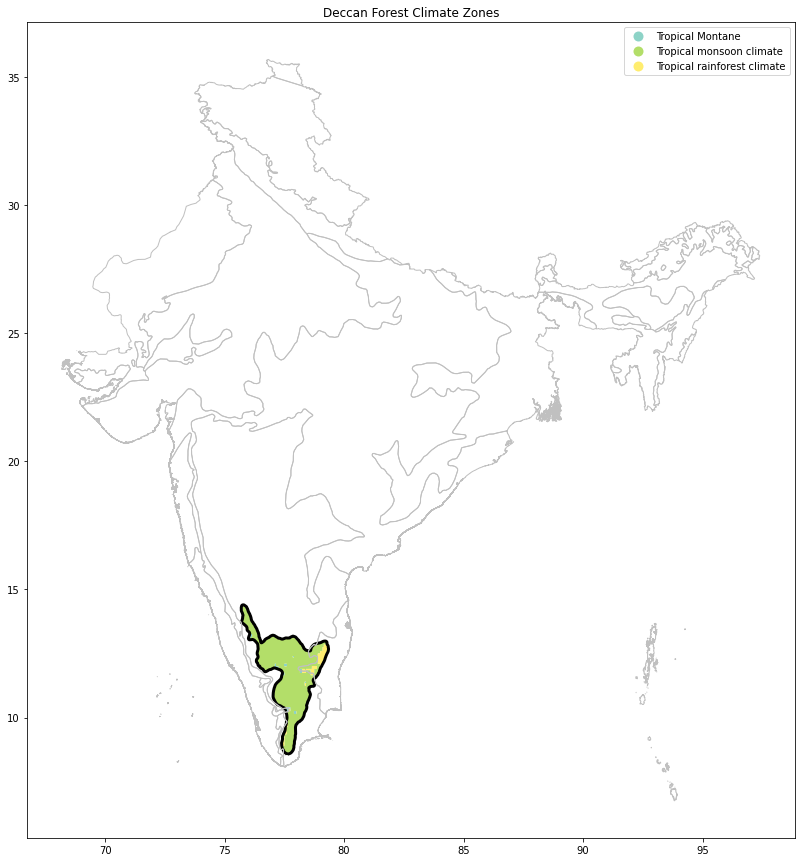

In [68]:
# visualize climate zones on the map
fig , ax = plt.subplots(1, 1, figsize = (20,15))

ax.set_title('South Deccan Plateau dry deciduous forests Climate Zones')

forest_climate.plot(ax = ax, cmap = 'Set3', column = 'class_name', legend = True)
forest.plot(ax=ax, color= 'none', edgecolor= 'black', linewidth= 3 )
india_boundary.plot(ax = ax, color ='none', edgecolor = 'silver'  )

plt.show

# **Soil Land Resource Database**

In [69]:
soil_url = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson'
soil = read_file(soil_url)

In [70]:
print(soil)

   SNAME         IPCC                                           geometry
0     AB  Albeluvisol  MULTIPOLYGON (((31.77594 49.15567, 31.98717 49...
1     AC      Acrisol  MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ...
2     AN      Andosol  MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ...
3     AR     Arenosol  MULTIPOLYGON (((60.36591 43.61313, 60.33553 43...
4     AT    Anthrosol  MULTIPOLYGON (((122.11467 30.15301, 121.90077 ...
5     CA          HAC  MULTIPOLYGON (((52.67126 24.32564, 52.60435 24...
6     CH    Chernozem  MULTIPOLYGON (((18.47098 46.52643, 18.59942 46...
7     CL     Calcisol  MULTIPOLYGON (((60.89771 44.26630, 60.90448 44...
8     CM     Cambisol  MULTIPOLYGON (((-73.72700 40.84144, -73.71150 ...
9     CR      Cryosol  MULTIPOLYGON (((-21.35851 76.47623, -21.46763 ...
10    DU      Durisol  MULTIPOLYGON (((15.35672 -22.93231, 15.30109 -...
11    FL     Fluvisol  MULTIPOLYGON (((68.41517 23.46780, 68.36872 23...
12    FR    Ferralsol  MULTIPOLYGON (((8.99690 -0.6

In [71]:
soil.rename(columns = {'IPCC' : 'ipcc'}, inplace = True)

In [72]:
soil = soil[['ipcc', 'geometry']]
#crop out the soil data for selected forest
forest_soil = soil.clip(forest)

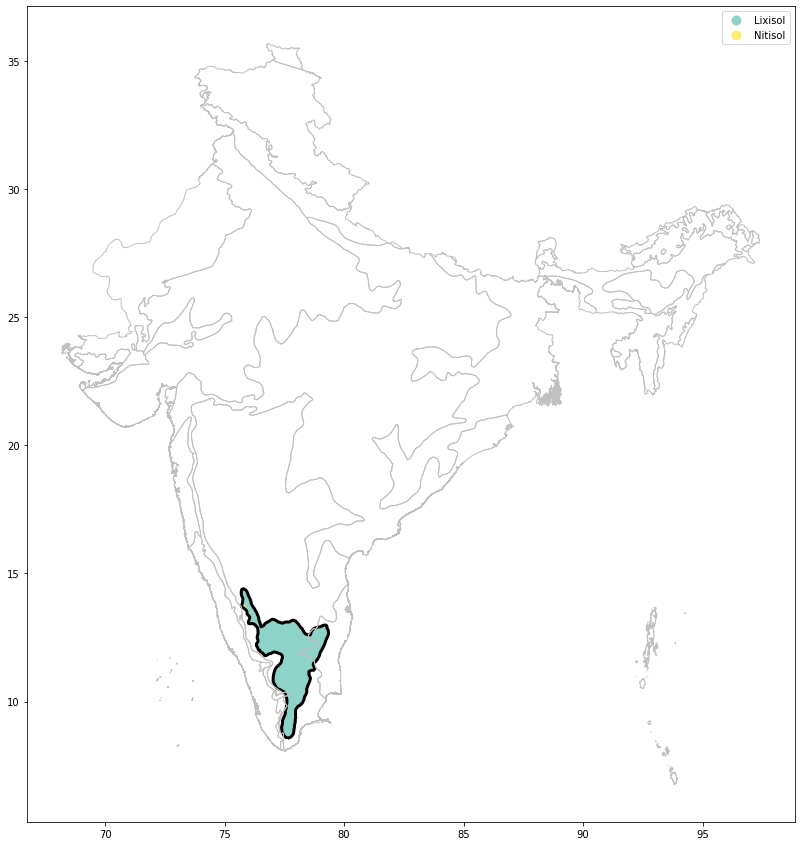

In [73]:
fig, ax = plt.subplots(1, 1 , figsize = (20, 15))
forest_soil.plot(ax = ax, cmap = 'Set3', column = 'ipcc', legend = True)
forest.plot(ax=ax, color= 'none', edgecolor= 'black', linewidth= 3 )
india_boundary.plot(ax = ax, color ='none', edgecolor = 'silver'  )


### **Exploring Bio Climatic and Ecological dataset**

**Agro-ecological zones**

In [74]:
agroEcological_zones_url = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson'

In [75]:
agroEcological_zones = read_file(agroEcological_zones_url)

In [76]:
values = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}



In [77]:
agroEcological_zones.rename(columns = {'Value' : 'value'}, inplace = True)

In [78]:
#crop out the agro ecological data for selected region
forest_agroEcological_zones = agroEcological_zones.clip(forest)

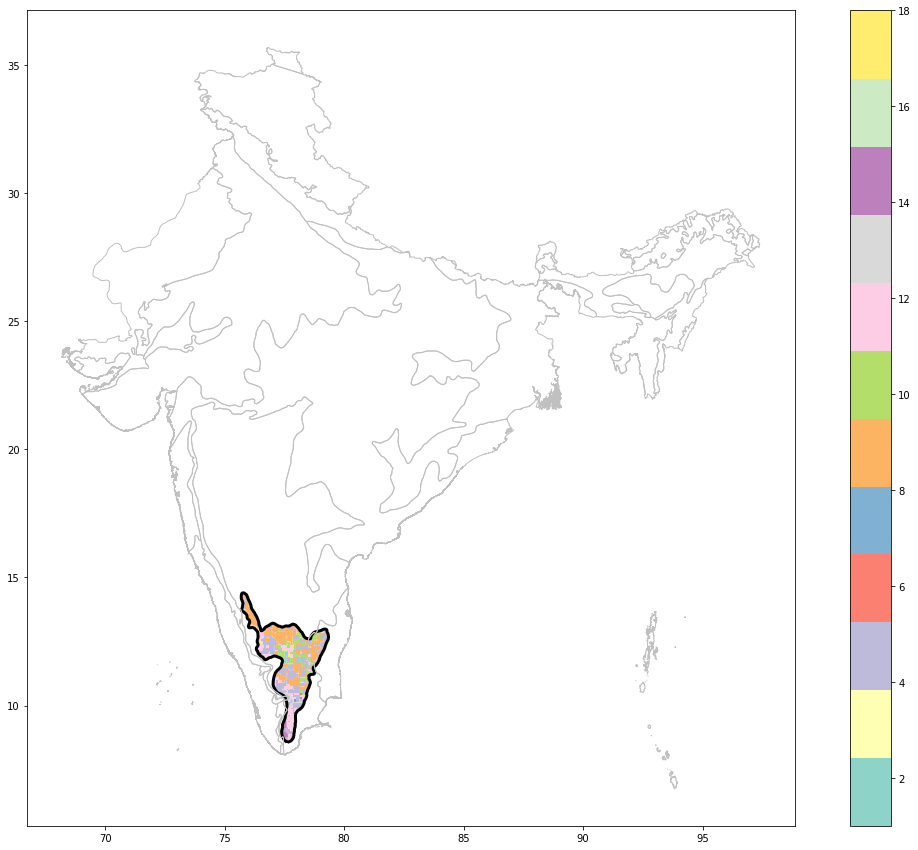

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
forest_agroEcological_zones.plot(ax = ax, cmap = 'Set3', column = 'value', legend = True)
forest.plot(ax=ax, color= 'none', edgecolor= 'black', linewidth= 3 )
india_boundary.plot(ax = ax, color ='none', edgecolor = 'silver'  )
plt.show()

In [80]:
ecological_zone_url    = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/GlobalEcologicalZone_GEZFAO2010.json'
ecological_zone = read_file(ecological_zone_url)

In [81]:
print(ecological_zone)

                        gez_name  gez_code gez_abbrev  \
0       Boreal coniferous forest        41         Ba   
1         Boreal mountain system        43         BM   
2         Boreal tundra woodland        42         Bb   
3                          Polar        50          P   
4             Subtropical desert        24       SBWh   
5         Subtropical dry forest        22        SCs   
6       Subtropical humid forest        21        SCf   
7    Subtropical mountain system        25         SM   
8             Subtropical steppe        23       SBSh   
9   Temperate continental forest        32       TeDc   
10              Temperate desert        34      TeBWk   
11     Temperate mountain system        35        TeM   
12      Temperate oceanic forest        31       TeDo   
13              Temperate steppe        33      TeBSk   
14               Tropical desert        15       TBWh   
15           Tropical dry forest        13       TAwb   

                              

In [82]:
ecological_zone = ecological_zone[['gez_name', 'geometry']]


In [83]:
# crop and clip the selected forest area
forest_ecological_zone = ecological_zone.clip(forest)

In [84]:
print(forest_ecological_zone)

               gez_name                                           geometry
15  Tropical dry forest  MULTIPOLYGON (((78.75865 12.85553, 78.75867 12...


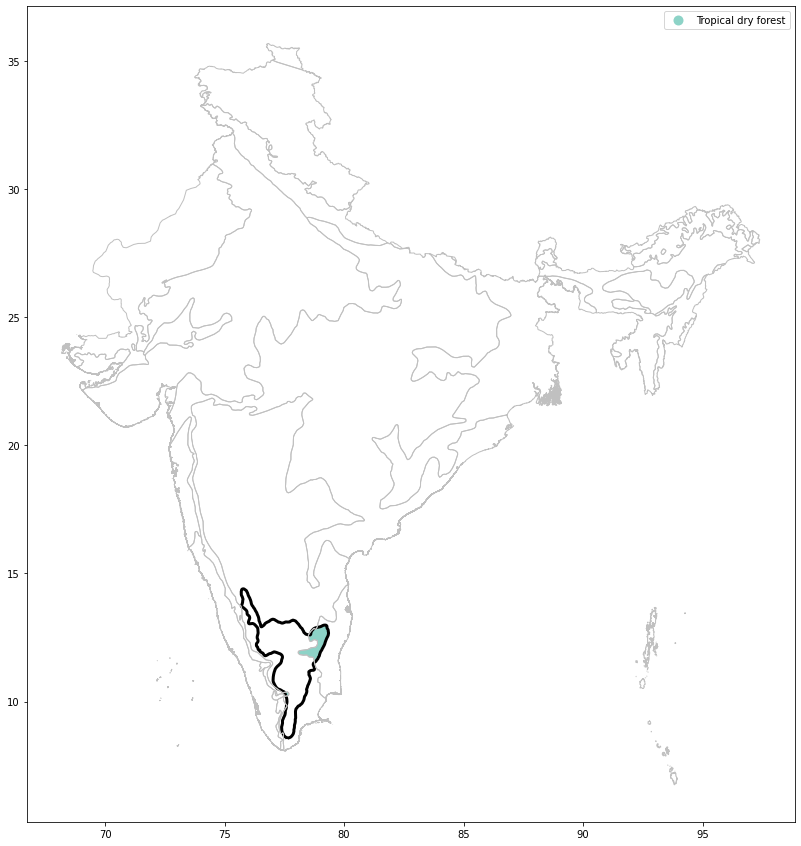

In [85]:
#visualie the ecological zones
fig, ax = plt.subplots(1, 1 , figsize = (20, 15))
forest_ecological_zone.plot(ax = ax, cmap = 'Set3', column = 'gez_name', legend = True)
forest.plot(ax=ax, color= 'none', edgecolor= 'black', linewidth= 3 )
india_boundary.plot(ax = ax, color ='none', edgecolor = 'silver'  )

## **Hodlridge Ecological Zone**

In [86]:
holdridge_zone_url    = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/HoldridgeLifeZones.json'
holdridge_zone = read_file(holdridge_zone_url)

In [87]:
print(holdridge_zone)

       FID    AREA  PERIMETER  HOLDRIG_  HOLDRIG_ID  ZONE  CASE_  FREQUENCY  \
0        0  240.50        173         2        3695     1      2         13   
1        1    1.25          6         3         110     2      3        232   
2        2   49.75         72         4         107     1      2         13   
3        3    0.25          2         5         108     2      3        232   
4        4    0.25          2         6         109     2      3        232   
...    ...     ...        ...       ...         ...   ...    ...        ...   
4826  4826    1.00          5      4828        3591     2      3        232   
4827  4827    0.25          2      4829        3583     5      6        241   
4828  4828    0.50          3      4830        3584     2      3        232   
4829  4829    0.25          2      4831        3586    10     11        254   
4830  4830    1.00          5      4832        3587     9     10        223   

                     DESC  SYMBOL  \
0             

In [88]:

holdridge_zone.rename(columns={'DESC': 'desc'}, inplace=True)
# get only necessary data related to forest
holdridge_zone = holdridge_zone[['desc', 'geometry']]
forest_holdridge_zone = holdridge_zone.clip(forest)

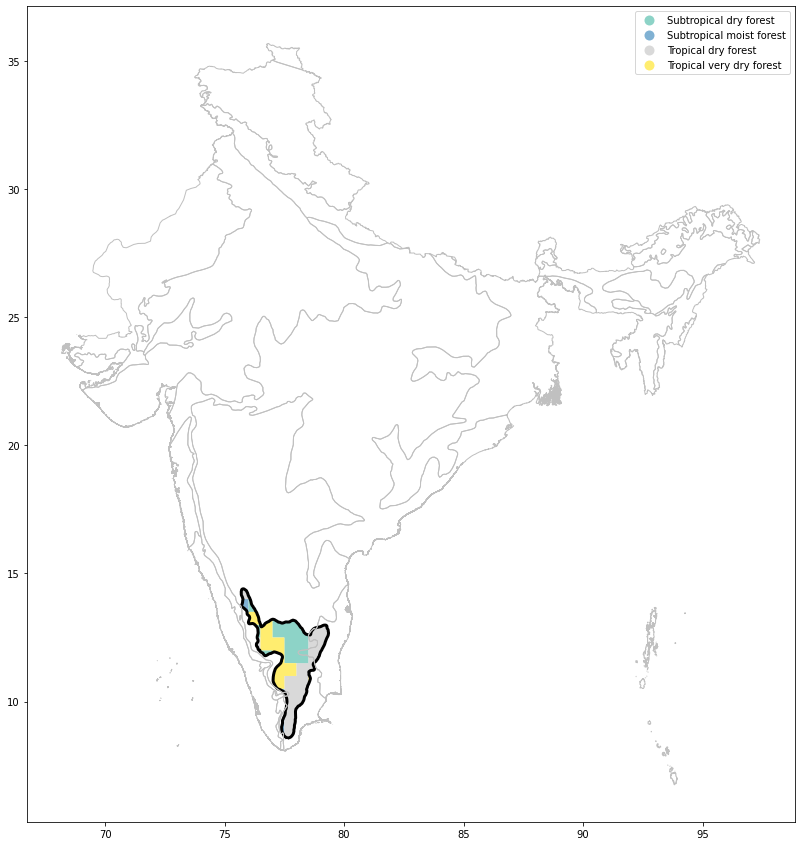

In [89]:
#visualize the holdridge zones
fig, ax = plt.subplots(1, 1 , figsize = (20, 15))
forest_holdridge_zone.plot(ax = ax, cmap = 'Set3', column = 'desc', legend = True)
forest.plot(ax=ax, color= 'none', edgecolor= 'black', linewidth= 3 )
india_boundary.plot(ax = ax, color ='none', edgecolor = 'silver'  )